In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mne

In [3]:
raw = mne.io.read_raw_edf('C:/Users/Pushkar Khetrapal/Documents/BCI/files/S001/S001R02.edf', preload = True)

Extracting EDF parameters from C:\Users\Pushkar Khetrapal\Documents\BCI\files\S001\S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


In [4]:
raw

<RawEDF  |  S001R02.edf, n_channels x n_times : 64 x 9760 (61.0 sec), ~4.9 MB, data loaded>

In [5]:
raw.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., ...
    chs : list | 64 items (EEG: 64)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 80.0 Hz
    meas_date : tuple | 2009-08-12 16:15:00 GMT
    nchan : int | 64
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 160.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_na

In [6]:
raw.rename_channels(lambda s: s.strip("."))

In [8]:
mne.channels.get_builtin_montages()

['EGI_256',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'biosemi128',
 'biosemi16',
 'biosemi160',
 'biosemi256',
 'biosemi32',
 'biosemi64',
 'easycap-M1',
 'easycap-M10',
 'mgh60',
 'mgh70',
 'standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed']

c:\users\pushkar khetrapal\appdata\local\programs\python\python37\lib\site-packages\mne\utils\docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
c:\users\pushkar khetrapal\appdata\local\programs\python\python37\lib\site-packages\mne\utils\docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-136-d517fb96feae>:2: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise

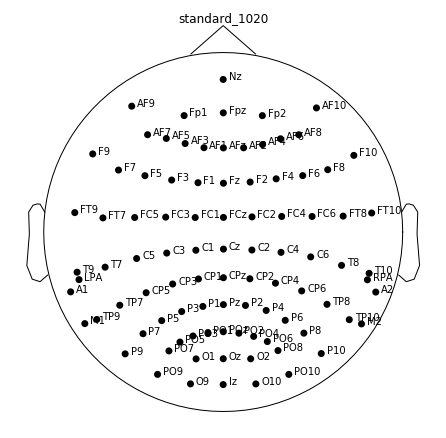

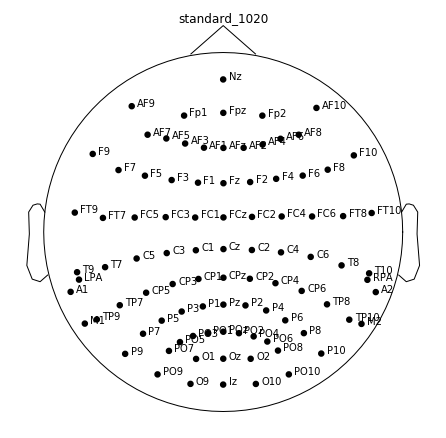

In [136]:
montage = mne.channels.read_montage("standard_1020")
montage.plot()

In [137]:
raw.set_montage(montage)

<ipython-input-137-fe790fd59c77>:1: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_isotrak``, or ``read_dig_captrack`` ``read_dig_hpts``, ``read_dig_captrack`` or ``read_custom_montage`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays.
  raw.set_montage(montage)


<RawEDF  |  S001R02.edf, n_channels x n_times : 64 x 9760 (61.0 sec), ~4.9 MB, data loaded>

In [138]:
raw.set_eeg_reference("average")

<RawEDF  |  S001R02.edf, n_channels x n_times : 64 x 9760 (61.0 sec), ~4.9 MB, data loaded>

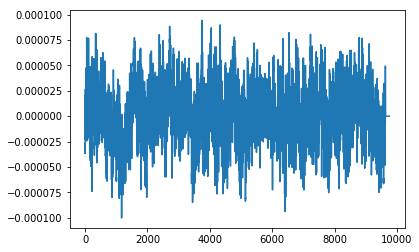

In [139]:
import matplotlib.pyplot as plt
plt.plot(raw._data[0])

In [140]:
print(raw.time_as_index(10))
print(raw.time_as_index([20, 30, 40]), '\n')

[1600]
[3200 4800 6400] 



In [141]:
eeg_and_eog = raw.copy().pick_types(meg=False, eeg=True, eog=True)
print(len(raw.ch_names), '→', len(eeg_and_eog.ch_names))

64 → 64


In [142]:
raw.ch_names

['Fc5',
 'Fc3',
 'Fc1',
 'Fcz',
 'Fc2',
 'Fc4',
 'Fc6',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'Cp5',
 'Cp3',
 'Cp1',
 'Cpz',
 'Cp2',
 'Cp4',
 'Cp6',
 'Fp1',
 'Fpz',
 'Fp2',
 'Af7',
 'Af3',
 'Afz',
 'Af4',
 'Af8',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'Ft7',
 'Ft8',
 'T7',
 'T8',
 'T9',
 'T10',
 'Tp7',
 'Tp8',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'Po7',
 'Po3',
 'Poz',
 'Po4',
 'Po8',
 'O1',
 'Oz',
 'O2',
 'Iz']

In [143]:
raw_temp = raw.copy()
print('Number of channels in raw_temp:')
print(len(raw_temp.ch_names), end=' → drop two → ')
raw_temp.drop_channels(['T10', 'P8'])

Number of channels in raw_temp:
64 → drop two → 

<RawEDF  |  S001R02.edf, n_channels x n_times : 62 x 9760 (61.0 sec), ~4.8 MB, data loaded>

In [144]:
len(raw_temp.ch_names)

62

In [145]:
channel_names = ['Pz', 'Iz', 'F1']
eog_and_frontal_eeg = raw.copy().reorder_channels(channel_names)
print(eog_and_frontal_eeg.ch_names)

['Pz', 'Iz', 'F1']


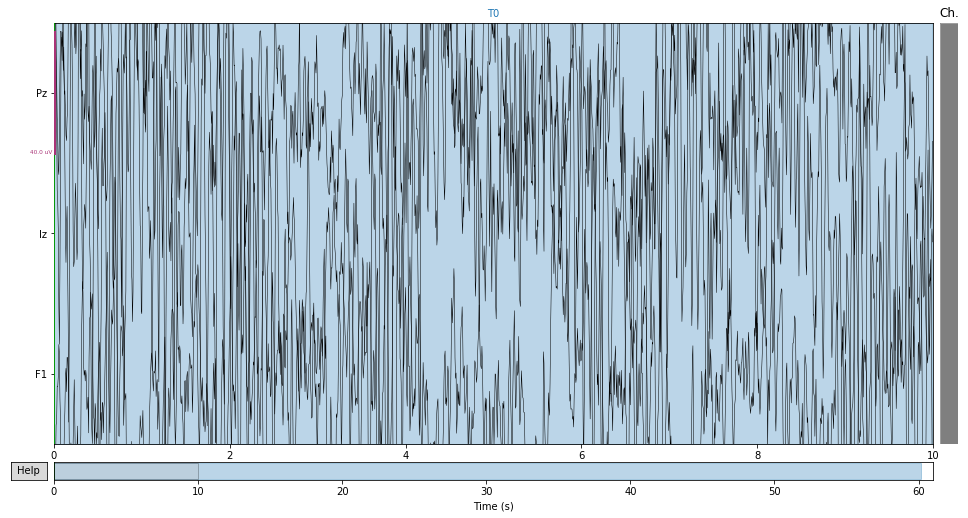

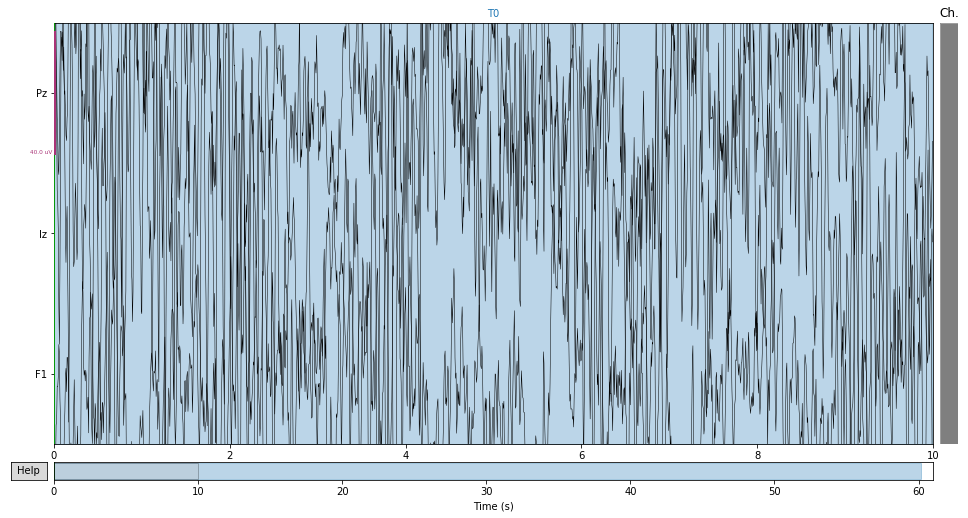

In [146]:
eog_and_frontal_eeg.plot()

In [147]:
eog_and_frontal_eeg.rename_channels({'Pz': 'blink detector'})

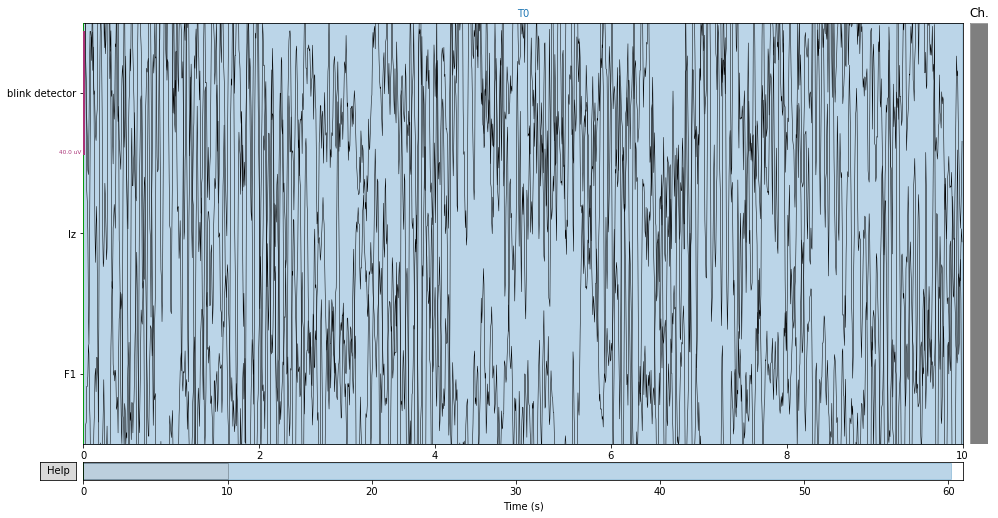

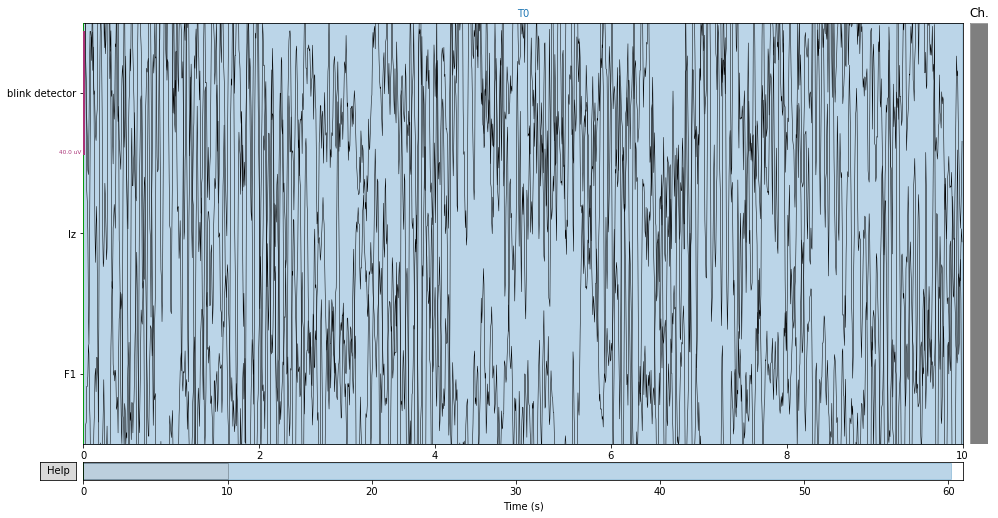

In [148]:
eog_and_frontal_eeg.plot()

In [149]:
print(raw.ch_names[-3:])
channel_renaming_dict = {name: name.replace(' ', '_') for name in raw.ch_names}
raw.rename_channels(channel_renaming_dict)
print(raw.ch_names[-3:])

['Oz', 'O2', 'Iz']
['Oz', 'O2', 'Iz']


In [150]:
len(raw._data[0])

9760

In [151]:
#selection time domain
raw_selection = raw.copy().crop(tmin=0, tmax=1)
print(raw_selection)


<RawEDF  |  S001R02.edf, n_channels x n_times : 64 x 161 (1.0 sec), ~253 kB, data loaded>


In [152]:
len(raw_selection._data[0])

161

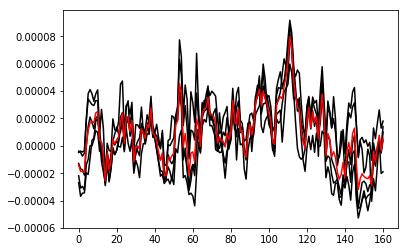

In [153]:
new = 0
#for i in range(17):
for j in range(5):
    new += raw_selection._data[j]
    plt.plot(raw_selection._data[j], color = 'black')
new = new/5
plt.plot(new, color = 'red')

In [186]:
f = np.fft.fft(raw_selection._data[0])
f1 = np.fft.fft(raw_selection._data[1])
f2 = np.fft.fft(new)

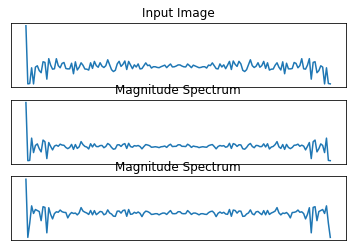

In [188]:
plt.subplot(311),plt.plot(f)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.plot(f1)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.plot(f2)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [100]:
print(raw_selection.times.min(), raw_selection.times.max())
raw_selection.crop(tmin=1)
print(raw_selection.times.min(), raw_selection.times.max())

0.0 1.0
0.0 0.0


# Extracting data by index

In [108]:
sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([11, 13])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
#print(raw_selection)
raw_selection[1]

array([11.     , 11.00625, 11.0125 , 11.01875, 11.025  , 11.03125,
       11.0375 , 11.04375, 11.05   , 11.05625, 11.0625 , 11.06875,
       11.075  , 11.08125, 11.0875 , 11.09375, 11.1    , 11.10625,
       11.1125 , 11.11875, 11.125  , 11.13125, 11.1375 , 11.14375,
       11.15   , 11.15625, 11.1625 , 11.16875, 11.175  , 11.18125,
       11.1875 , 11.19375, 11.2    , 11.20625, 11.2125 , 11.21875,
       11.225  , 11.23125, 11.2375 , 11.24375, 11.25   , 11.25625,
       11.2625 , 11.26875, 11.275  , 11.28125, 11.2875 , 11.29375,
       11.3    , 11.30625, 11.3125 , 11.31875, 11.325  , 11.33125,
       11.3375 , 11.34375, 11.35   , 11.35625, 11.3625 , 11.36875,
       11.375  , 11.38125, 11.3875 , 11.39375, 11.4    , 11.40625,
       11.4125 , 11.41875, 11.425  , 11.43125, 11.4375 , 11.44375,
       11.45   , 11.45625, 11.4625 , 11.46875, 11.475  , 11.48125,
       11.4875 , 11.49375, 11.5    , 11.50625, 11.5125 , 11.51875,
       11.525  , 11.53125, 11.5375 , 11.54375, 11.55   , 11.55

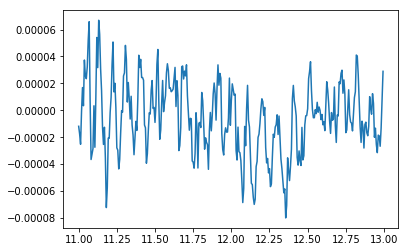

In [109]:
x = raw_selection[1]
y = raw_selection[0].T
plt.plot(x, y)

# Extracting channels by name

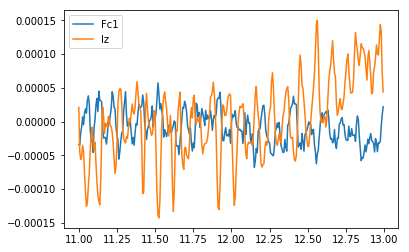

In [115]:
channel_names = ['Fc1', 'Iz']
two_meg_chans = raw[channel_names, start_sample:stop_sample]
y_offset = np.array([5e-11, 0])  # just enough to separate the channel traces
x = two_meg_chans[1]
y = two_meg_chans[0].T + y_offset
lines = plt.plot(x, y)
plt.legend(lines, channel_names)

# Extracting channels by type

In [116]:
eeg_channel_indices = mne.pick_types(raw.info, meg=False, eeg=True)
eeg_data, times = raw[eeg_channel_indices]
print(eeg_data.shape)

(64, 9760)


In [126]:
eeg_channel_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

# data without indices

In [127]:
data = raw.get_data()
print(data.shape)

(64, 9760)


In [128]:
data, times = raw.get_data(return_times=True)
print(data.shape)
print(times.shape)

(64, 9760)
(9760,)
